In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime

In [3]:
plt.rc('font', family='NanumSquare')

In [4]:
df = pd.read_pickle('./pkl_data/중소유통물류_예측상품.pkl')
df

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명
0,2021-01-04,매출,37544,1,BX,5*8,40,1.880105e+13,오뚜기]진라면매운멀티<120g>
1,2021-01-04,매출,37817,1,BX,5*8,40,1.880105e+13,오뚜기]진라면매운멀티<120g>
2,2021-01-04,매출,37888,1,BX,5*8,40,1.880105e+13,오뚜기]진라면매운멀티<120g>
3,2021-01-05,매출,37815,1,BX,5*8,40,1.880105e+13,오뚜기]진라면매운멀티<120g>
4,2021-01-05,매출,37921,1,BX,5*8,40,1.880105e+13,오뚜기]진라면매운멀티<120g>
...,...,...,...,...,...,...,...,...,...
21969,2022-07-01,매출,37836,12,EA,1.5L*12,1,8.801094e+12,코카콜라<1.5*12>
21970,2022-07-01,매출,37853,12,EA,1.5L*12,1,8.801094e+12,코카콜라<1.5*12>
21971,2022-07-01,매출,37890,12,EA,1.5L*12,1,8.801094e+12,코카콜라<1.5*12>
21972,2022-07-01,매출,37907,12,EA,1.5L*12,1,8.801094e+12,코카콜라<1.5*12>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21974 entries, 0 to 21973
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   판매일     21974 non-null  datetime64[ns]
 1   구분      21974 non-null  object        
 2   우편번호    21974 non-null  object        
 3   판매수량    21974 non-null  int64         
 4   옵션코드    21974 non-null  object        
 5   규격      21974 non-null  object        
 6   입수      21974 non-null  int64         
 7   상품 바코드  21974 non-null  float64       
 8   상품명     21974 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.7+ MB


In [15]:
df[['옵션코드', '상품명']].value_counts()

옵션코드  상품명              
CS    가야산천년수<2L*6>         5941
BX    농심]안성탕면 멀티<40>       2772
CS    삼다수2L                2725
BX    농심]신라면 멀티<40>        2268
      농심]짜파게티 멀티<40>       1869
      오뚜기]진라면매운멀티<120g>    1548
      레쓰비<175ml*30>        1491
      농심]너구리 얼큰멀티<40>      1369
EA    코카콜라<1.5*12>         1264
CS    박카스F 120ml            727
dtype: int64

In [6]:
df = df[df['구분'] == '매출'].reset_index(drop=True)

In [7]:
#train = df[['판매일', '우편번호', '상품명', '판매수량']]
train = df[['판매일', '상품명', '판매수량']]
train = train.set_index(train['판매일'])
train.index = train.index.to_period(freq='W').to_timestamp(how='start')
train.index.name = 'date_w'
train

,판매일,상품명,판매수량
date_w,,,
2021-01-04,2021-01-04,오뚜기]진라면매운멀티<120g>,1
2021-01-04,2021-01-04,오뚜기]진라면매운멀티<120g>,1
2021-01-04,2021-01-04,오뚜기]진라면매운멀티<120g>,1
2021-01-04,2021-01-05,오뚜기]진라면매운멀티<120g>,1
2021-01-04,2021-01-05,오뚜기]진라면매운멀티<120g>,1
...,...,...,...
2022-06-27,2022-07-01,코카콜라<1.5*12>,12
2022-06-27,2022-07-01,코카콜라<1.5*12>,12
2022-06-27,2022-07-01,코카콜라<1.5*12>,12


In [8]:
train = train.reset_index()
train.drop('판매일', axis=1, inplace=True)

#### EDA

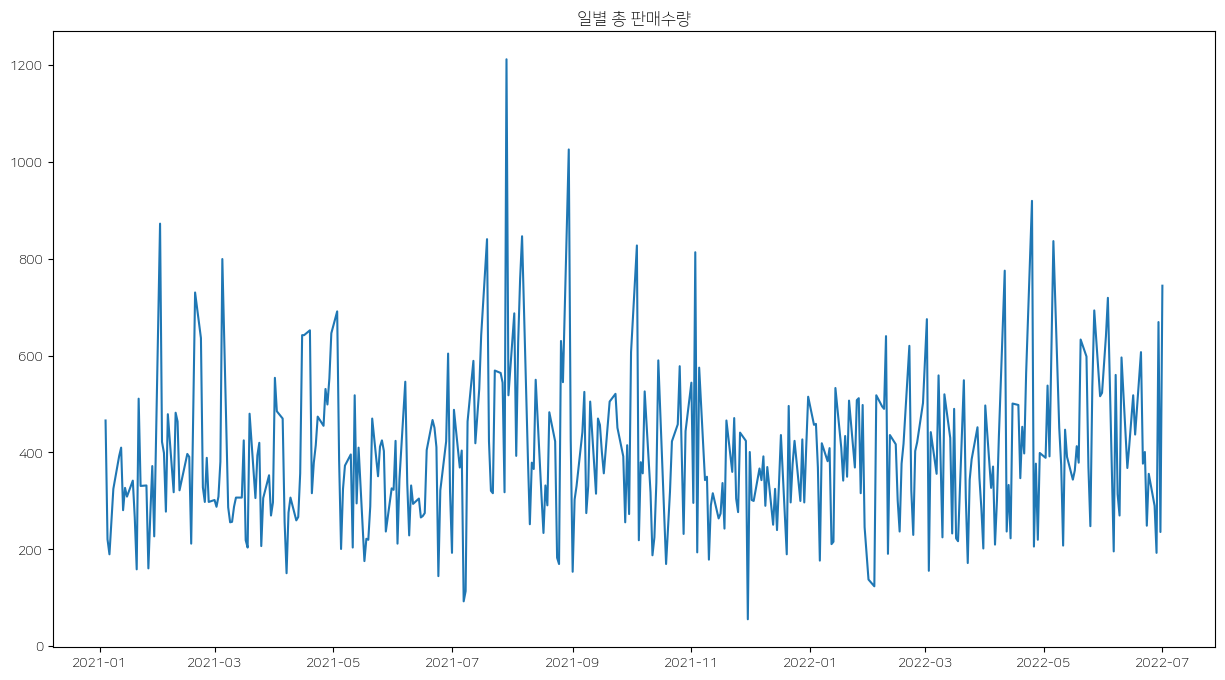

In [7]:
daily_sales = train.groupby('판매일', as_index=False)['판매수량'].sum()
plt.figure(figsize=(15,8))
plt.plot(daily_sales['판매일'], daily_sales['판매수량'])
plt.title('일별 총 판매수량')
plt.show()

In [10]:
sales_item = train.groupby(['판매일', '상품명'], as_index=False)['판매수량'].sum()

,판매일,상품명,판매수량
0,2021-01-04,가야산천년수<2L*6>,258
1,2021-01-04,농심]너구리 얼큰멀티<40>,7
2,2021-01-04,농심]신라면 멀티<40>,14
3,2021-01-04,농심]안성탕면 멀티<40>,20
4,2021-01-04,농심]짜파게티 멀티<40>,7
...,...,...,...
3582,2022-07-01,레쓰비<175ml*30>,16
3583,2022-07-01,박카스F 120ml,37
3584,2022-07-01,삼다수2L,86
3585,2022-07-01,오뚜기]진라면매운멀티<120g>,17


In [17]:
sales_item['month'] = sales_item['판매일'].dt.month
sales_item['week'] = sales_item['판매일'].dt.week
sales_item['weekday'] = sales_item['판매일'].dt.weekday # 0부터 월요일

In [28]:
sales_item.groupby('month')[['판매수량']].mean()
sales_item.groupby('month')[['판매수량']].sum()

,판매수량
month,
1,14416
2,14856
3,15231
4,18177
5,16969
6,16115
7,11149
8,10300
9,7679


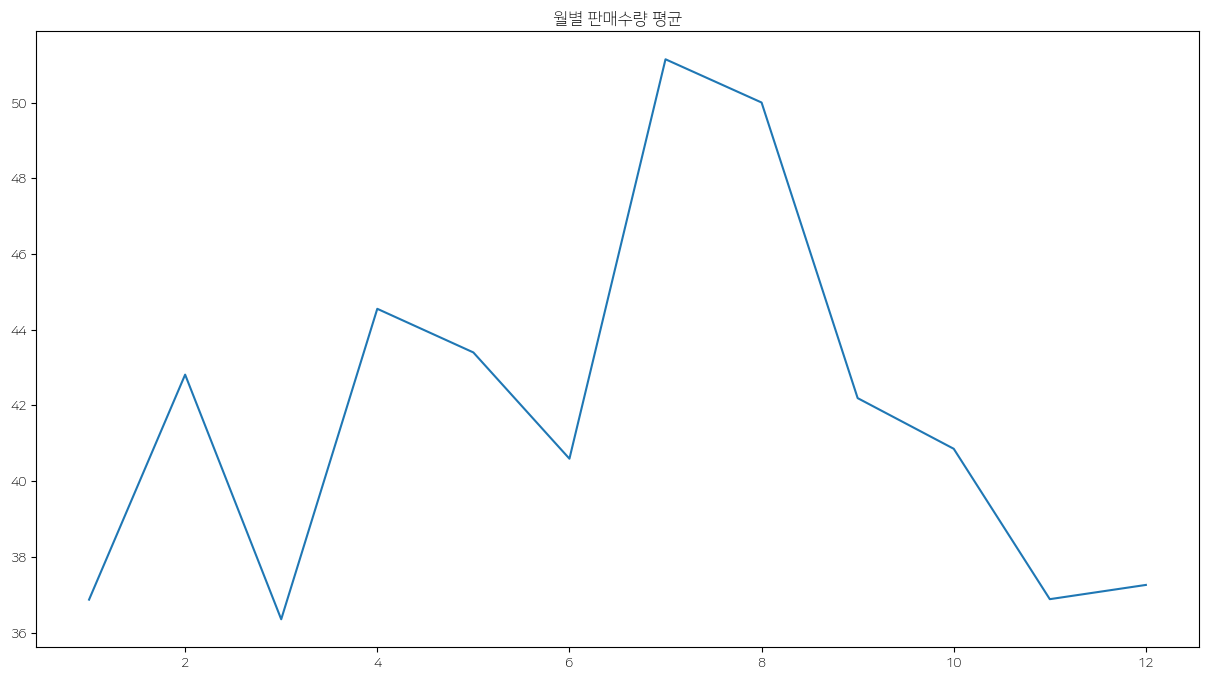

In [29]:
plt.figure(figsize=(15,8))
plt.plot(sales_item.groupby('month')[['판매수량']].mean().index, sales_item.groupby('month')[['판매수량']].mean().values)
plt.title('월별 판매수량 평균 (10개 상품에 대해)')
plt.show()

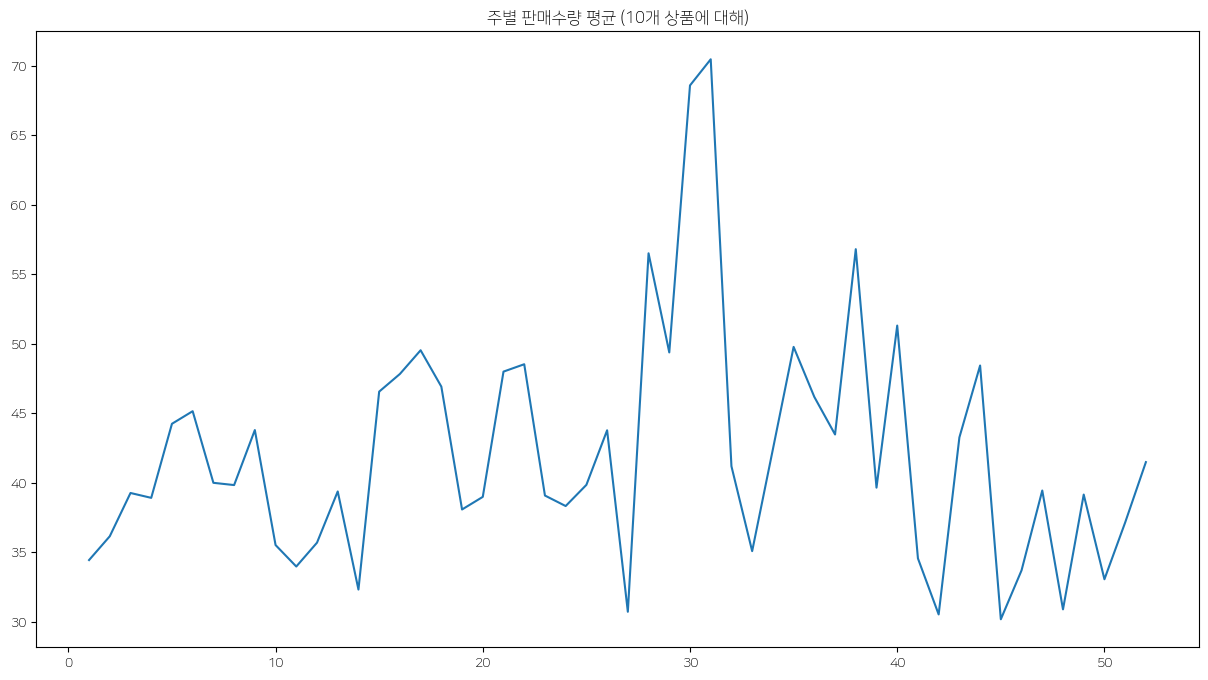

In [42]:
plt.figure(figsize=(15,8))
plt.plot(sales_item.groupby('week')[['판매수량']].mean().index, sales_item.groupby('week')[['판매수량']].mean().values)
plt.title('주별 판매수량 평균 (10개 상품에 대해)')
plt.show()

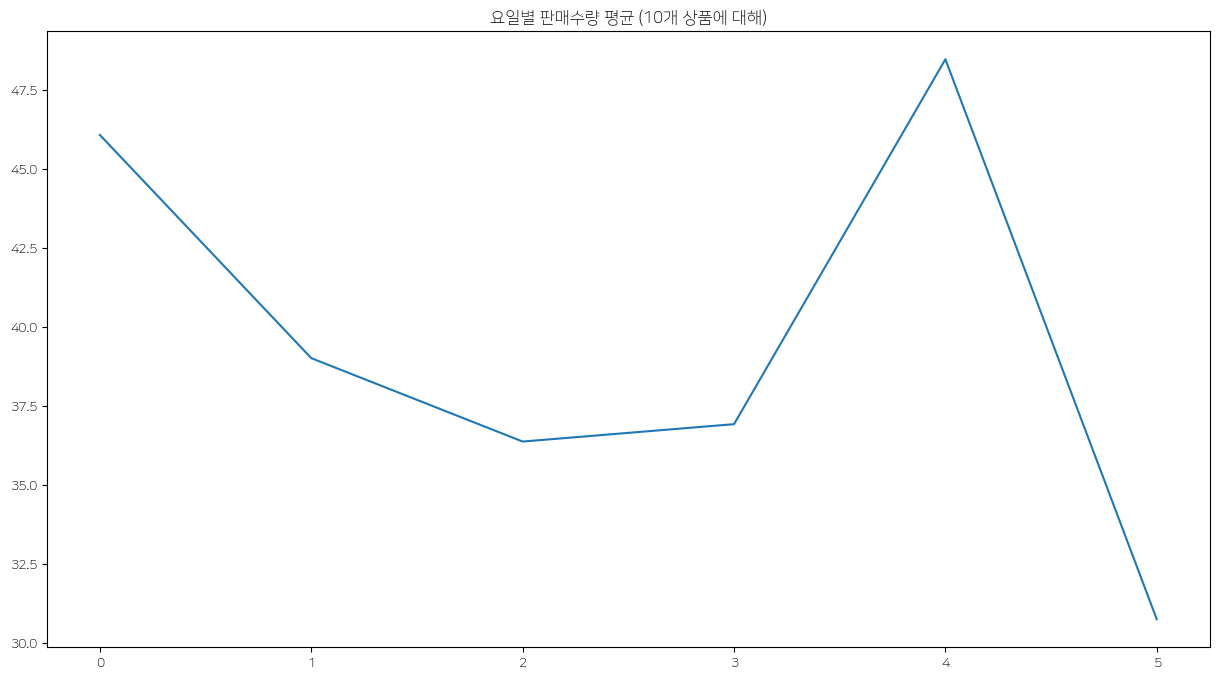

In [44]:
plt.figure(figsize=(15,8))
plt.plot(sales_item.groupby('weekday')[['판매수량']].mean().index, sales_item.groupby('weekday')[['판매수량']].mean().values)
plt.title('요일별 판매수량 평균 (10개 상품에 대해)')
plt.show()

In [23]:
items = sales_item['상품명'].value_counts().index.tolist()

In [40]:
sales_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587 entries, 0 to 3586
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   판매일      3587 non-null   datetime64[ns]
 1   상품명      3587 non-null   object        
 2   판매수량     3587 non-null   int64         
 3   month    3587 non-null   int64         
 4   week     3587 non-null   int64         
 5   weekday  3587 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 168.3+ KB


#### 전처리

In [ ]:
# Time Series에 맞게 데이터 형태 변환
# 우리의 Test Set은 26주 이기 때문에 -> 26주
# 10주치 데이터로 26주 뒤를 학습

In [9]:
train_gp = train.sort_values('date_w').groupby(['상품명','date_w'], as_index=False)
train_gp = train_gp.agg({'판매수량':['sum']})
train_gp.columns = ['상품명', 'date_w', '판매수량']
train_gp

,상품명,date_w,판매수량
0,가야산천년수<2L*6>,2021-01-04,812
1,가야산천년수<2L*6>,2021-01-11,1047
2,가야산천년수<2L*6>,2021-01-18,718
3,가야산천년수<2L*6>,2021-01-25,836
4,가야산천년수<2L*6>,2021-02-01,1415
...,...,...,...
773,코카콜라<1.5*12>,2022-05-30,504
774,코카콜라<1.5*12>,2022-06-06,372
775,코카콜라<1.5*12>,2022-06-13,360
776,코카콜라<1.5*12>,2022-06-20,312


In [10]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    agg = agg[agg['상품명(t-%d)' % window] == agg['상품명(t)']]
    agg = agg[agg['상품명(t+%d)' % lag] == agg['상품명(t)']]
     
    return agg

In [11]:
window = 10
lag = 26
series = series_to_supervised(train_gp, window=window, lag=lag)

In [12]:
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['상품명', 'date_w']]

for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['상품명', 'date_w']]

series.drop(columns_to_drop, axis=1, inplace=True)
#series.drop(['상품명(t)'], axis=1, inplace=True)

In [14]:
series['date_w(t+26)'] = series['date_w(t)'] + datetime.timedelta(weeks=26)

In [15]:
series.drop('date_w(t)', axis=1, inplace=True)

#### train/validation 분리

In [18]:
label_col = '판매수량(t+%d)' % lag
label = series[[label_col, 'date_w(t+26)', '상품명(t)']]
series = series.drop([label_col, 'date_w(t+26)', '상품명(t)'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(series, label, test_size=0.2, random_state=0)
print('train 데이터:', x_train.shape)
print('val 데이터:', x_val.shape)

train 데이터: (334, 11)
val 데이터: (84, 11)


#### MLP 적용

In [23]:
import keras

In [24]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Conv1D, MaxPooling1D

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.legacy.Adam(lr)

In [27]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=x_train.shape[1]))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=adam)
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1301 (5.08 KB)
Trainable params: 1301 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
mlp_history = model_mlp.fit(x_train.values, y_train['판매수량(t+26)'].values, 
                            validation_data=(x_val.values, y_val['판매수량(t+26)'].values), 
                            epochs=epochs, verbose=2)

Epoch 1/40
11/11 - 0s - loss: 97326.1797 - val_loss: 121242.0703 - 302ms/epoch - 27ms/step
Epoch 2/40
11/11 - 0s - loss: 62913.1250 - val_loss: 66501.1094 - 48ms/epoch - 4ms/step
Epoch 3/40
11/11 - 0s - loss: 41096.5195 - val_loss: 34443.5430 - 33ms/epoch - 3ms/step
Epoch 4/40
11/11 - 0s - loss: 29592.5488 - val_loss: 21345.0859 - 34ms/epoch - 3ms/step
Epoch 5/40
11/11 - 0s - loss: 25331.0742 - val_loss: 17331.7480 - 29ms/epoch - 3ms/step
Epoch 6/40
11/11 - 0s - loss: 24202.5859 - val_loss: 16533.1289 - 35ms/epoch - 3ms/step
Epoch 7/40
11/11 - 0s - loss: 23985.7988 - val_loss: 16408.9023 - 33ms/epoch - 3ms/step
Epoch 8/40
11/11 - 0s - loss: 23860.5488 - val_loss: 16368.3271 - 34ms/epoch - 3ms/step
Epoch 9/40
11/11 - 0s - loss: 23677.8047 - val_loss: 16435.4902 - 28ms/epoch - 3ms/step
Epoch 10/40
11/11 - 0s - loss: 23450.8691 - val_loss: 16916.5801 - 41ms/epoch - 4ms/step
Epoch 11/40
11/11 - 0s - loss: 23412.0938 - val_loss: 16718.7441 - 33ms/epoch - 3ms/step
Epoch 12/40
11/11 - 0s - lo

In [30]:
mlp_train_pred = model_mlp.predict(x_train.values)
mlp_valid_pred = model_mlp.predict(x_val.values)
print('Train rmse:', np.sqrt(mean_squared_error(y_train['판매수량(t+26)'], mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_val['판매수량(t+26)'], mlp_valid_pred)))

3/3 [==============================] - 0s 2ms/step
Train rmse: 140.55964773309123
Validation rmse: 128.16878930816807


In [35]:
pred_val = y_val.copy()
pred_val = pred_val[['date_w(t+26)', '상품명(t)', '판매수량(t+26)']]

pred_train = y_train.copy()
pred_train = pred_train[['date_w(t+26)', '상품명(t)', '판매수량(t+26)']]

In [36]:
pred_val['mlp_pred'] = mlp_valid_pred
pred_train['mlp_pred'] = mlp_train_pred

#### cnn 적용

In [39]:
x_train_series = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val_series = x_val.values.reshape((x_val.shape[0], x_val.shape[1], 1))
print('Train set shape', x_train_series.shape)
print('Validation set shape', x_val_series.shape)

Train set shape (334, 11, 1)
Validation set shape (84, 11, 1)


In [40]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train_series.shape[1], x_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=adam)
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                16050     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16293 (63.64 KB)
Trainable params: 16293 (63.64 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [41]:
cnn_history = model_cnn.fit(x_train_series, y_train['판매수량(t+26)'].values, 
                            validation_data=(x_val_series, y_val['판매수량(t+26)'].values),
                            epochs=epochs, verbose=2)

Epoch 1/40
11/11 - 0s - loss: 85042.9375 - val_loss: 19019.6094 - 289ms/epoch - 26ms/step
Epoch 2/40
11/11 - 0s - loss: 23266.7402 - val_loss: 27377.3516 - 49ms/epoch - 4ms/step
Epoch 3/40
11/11 - 0s - loss: 22120.6660 - val_loss: 17101.8438 - 26ms/epoch - 2ms/step
Epoch 4/40
11/11 - 0s - loss: 20654.2715 - val_loss: 16882.2461 - 45ms/epoch - 4ms/step
Epoch 5/40
11/11 - 0s - loss: 19730.3125 - val_loss: 16932.7520 - 39ms/epoch - 4ms/step
Epoch 6/40
11/11 - 0s - loss: 19862.0215 - val_loss: 17915.9258 - 38ms/epoch - 3ms/step
Epoch 7/40
11/11 - 0s - loss: 19377.3613 - val_loss: 17028.1836 - 24ms/epoch - 2ms/step
Epoch 8/40
11/11 - 0s - loss: 19135.1543 - val_loss: 16863.6250 - 36ms/epoch - 3ms/step
Epoch 9/40
11/11 - 0s - loss: 19427.9141 - val_loss: 16952.4473 - 37ms/epoch - 3ms/step
Epoch 10/40
11/11 - 0s - loss: 19342.2793 - val_loss: 16635.6426 - 26ms/epoch - 2ms/step
Epoch 11/40
11/11 - 0s - loss: 18719.8613 - val_loss: 16850.5566 - 35ms/epoch - 3ms/step
Epoch 12/40
11/11 - 0s - los

In [42]:
cnn_train_pred = model_cnn.predict(x_train_series)
cnn_valid_pred = model_cnn.predict(x_val_series)
print('Train rmse:', np.sqrt(mean_squared_error(y_train['판매수량(t+26)'], cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_val['판매수량(t+26)'], cnn_valid_pred)))

3/3 [==============================] - 0s 1ms/step
Train rmse: 125.57119007734524
Validation rmse: 128.84059936296853


In [43]:
pred_val['cnn_pred'] = cnn_valid_pred
pred_train['cnn_pred'] = cnn_train_pred

#### LSTM 적용

In [44]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(x_train_series.shape[1], x_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=adam)
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
lstm_history = model_lstm.fit(x_train_series, y_train['판매수량(t+26)'].values,
                              validation_data=(x_val_series, y_val['판매수량(t+26)'].values),
                              epochs=epochs, verbose=2)

Epoch 1/40
11/11 - 1s - loss: 84264.3359 - val_loss: 92088.0781 - 717ms/epoch - 65ms/step
Epoch 2/40
11/11 - 0s - loss: 57101.9219 - val_loss: 52264.7188 - 57ms/epoch - 5ms/step
Epoch 3/40
11/11 - 0s - loss: 36902.1406 - val_loss: 36099.3828 - 54ms/epoch - 5ms/step
Epoch 4/40
11/11 - 0s - loss: 32029.9941 - val_loss: 71153.9531 - 58ms/epoch - 5ms/step
Epoch 5/40
11/11 - 0s - loss: 34459.2891 - val_loss: 50748.2031 - 57ms/epoch - 5ms/step
Epoch 6/40
11/11 - 0s - loss: 26264.1914 - val_loss: 34315.4336 - 59ms/epoch - 5ms/step
Epoch 7/40
11/11 - 0s - loss: 25273.0996 - val_loss: 40233.4375 - 57ms/epoch - 5ms/step
Epoch 8/40
11/11 - 0s - loss: 25627.4004 - val_loss: 39254.1953 - 60ms/epoch - 5ms/step
Epoch 9/40
11/11 - 0s - loss: 27965.3535 - val_loss: 37084.4297 - 57ms/epoch - 5ms/step
Epoch 10/40
11/11 - 0s - loss: 27287.2637 - val_loss: 32560.3457 - 59ms/epoch - 5ms/step
Epoch 11/40
11/11 - 0s - loss: 26406.8691 - val_loss: 31682.0117 - 57ms/epoch - 5ms/step
Epoch 12/40
11/11 - 0s - los

In [46]:
lstm_train_pred = model_lstm.predict(x_train_series)
lstm_valid_pred = model_lstm.predict(x_val_series)
print('Train rmse:', np.sqrt(mean_squared_error(y_train['판매수량(t+26)'], lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_val['판매수량(t+26)'], lstm_valid_pred)))

3/3 [==============================] - 0s 2ms/step
Train rmse: 152.21632372303478
Validation rmse: 140.20105357572518


In [47]:
pred_val['lstm_pred'] = lstm_valid_pred
pred_train['lstm_pred'] = lstm_train_pred

#### 결과 확인

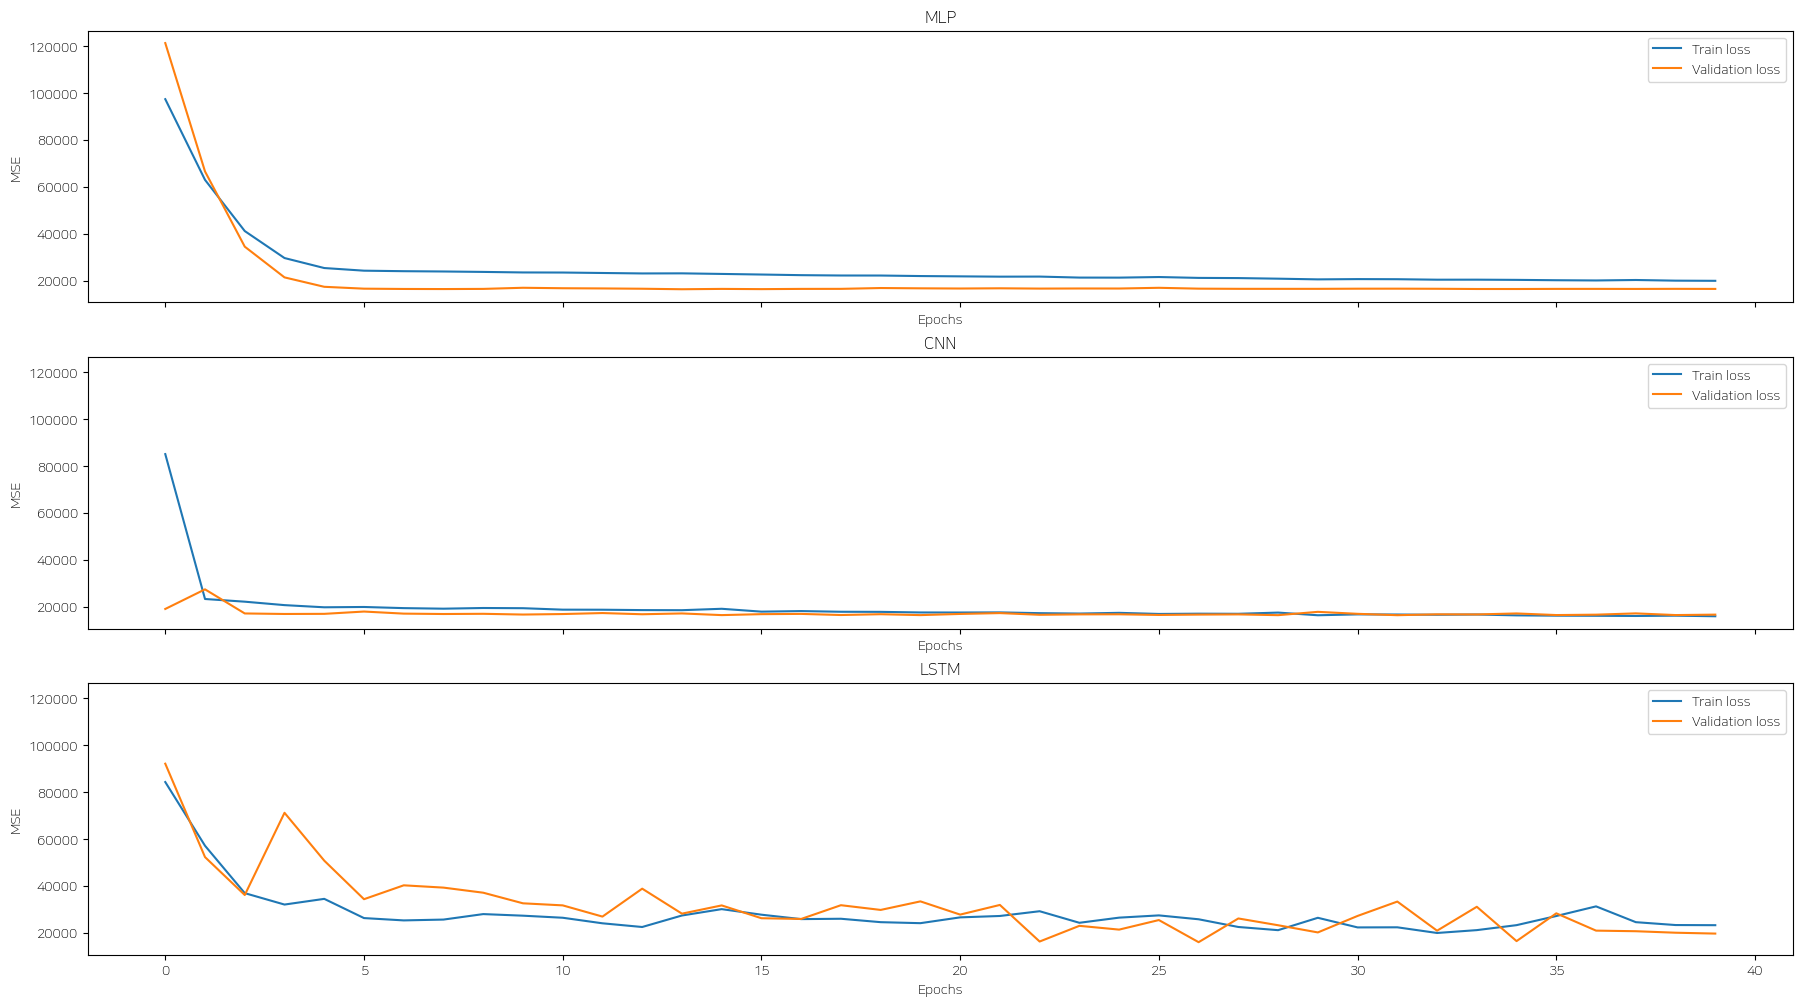

In [48]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2, ax3 = axes[0], axes[1], axes[2]

ax1.plot(mlp_history.history['loss'], label='Train loss')
ax1.plot(mlp_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.plot(cnn_history.history['val_loss'], label='Validation loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(lstm_history.history['loss'], label='Train loss')
ax3.plot(lstm_history.history['val_loss'], label='Validation loss')
ax3.legend(loc='best')
ax3.set_title('LSTM')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

plt.show()

#### train / val 시각화

#### - 특정 상품 으로 보기

In [ ]:
# 나중에 함수로 만들어놓기

In [51]:
가야_true = train_gp[train_gp['상품명'] == '가야산천년수<2L*6>']
가야_true

,상품명,date_w,판매수량
0,가야산천년수<2L*6>,2021-01-04,812
1,가야산천년수<2L*6>,2021-01-11,1047
2,가야산천년수<2L*6>,2021-01-18,718
3,가야산천년수<2L*6>,2021-01-25,836
4,가야산천년수<2L*6>,2021-02-01,1415
...,...,...,...
73,가야산천년수<2L*6>,2022-05-30,1179
74,가야산천년수<2L*6>,2022-06-06,917
75,가야산천년수<2L*6>,2022-06-13,925
76,가야산천년수<2L*6>,2022-06-20,1196


In [56]:
가야_pred_train = pred_train[pred_train['상품명(t)'] == '가야산천년수<2L*6>'].sort_values(by='date_w(t+26)')
가야_pred_valid = pred_val[pred_val['상품명(t)'] == '가야산천년수<2L*6>'].sort_values(by='date_w(t+26)')

In [57]:
가야_pred = pd.concat([가야_pred_train, 가야_pred_valid], axis=0).sort_values(by='date_w(t+26)')

In [58]:
가야_pred # 판매수량 (t + 26) 값이 2022-06월 이후에도 존재하는 게 문제임..
# t+26 값이 실제 해당 데이터의 t+26값인지 확인해볼 필요 있음 == 해결 ! 여기가 오류였음.

,date_w(t+26),상품명(t),판매수량(t+26),mlp_pred,cnn_pred,lstm_pred
10,2021-09-13,가야산천년수<2L*6>,1221.0,835.222656,810.714294,805.834900
11,2021-09-20,가야산천년수<2L*6>,830.0,676.192993,682.077148,816.350342
12,2021-09-27,가야산천년수<2L*6>,1220.0,831.447998,775.925720,684.835205
13,2021-10-04,가야산천년수<2L*6>,1592.0,936.118774,952.761169,698.506592
14,2021-10-11,가야산천년수<2L*6>,902.0,811.026855,963.779480,658.292969
15,2021-10-18,가야산천년수<2L*6>,607.0,803.889771,859.747620,793.872681
16,2021-10-25,가야산천년수<2L*6>,1364.0,1006.215210,993.522766,857.410889
17,2021-11-01,가야산천년수<2L*6>,1188.0,906.587463,990.904419,959.997803
18,2021-11-08,가야산천년수<2L*6>,589.0,834.833679,906.131470,824.054749
19,2021-11-15,가야산천년수<2L*6>,645.0,822.764526,855.082947,1024.945068


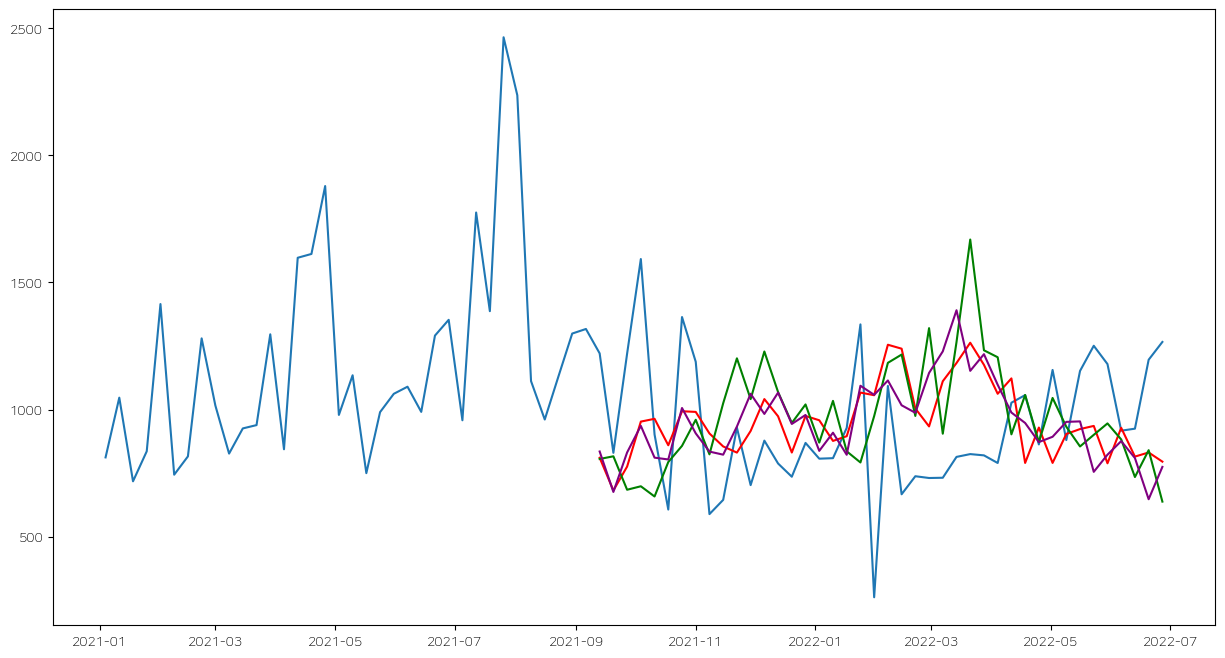

In [60]:
plt.figure(figsize=(15,8))
plt.plot(가야_true['date_w'], 가야_true['판매수량'])
plt.plot(가야_pred['date_w(t+26)'], 가야_pred['cnn_pred'], color='red')
plt.plot(가야_pred['date_w(t+26)'], 가야_pred['lstm_pred'], color='green')
plt.plot(가야_pred['date_w(t+26)'], 가야_pred['mlp_pred'], color='purple')
plt.show()

#### 실제 예측하기

In [227]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1301 (5.08 KB)
Trainable params: 1301 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
train_gp

,상품명,date_w,판매수량
0,가야산천년수<2L*6>,2021-01-04,812
1,가야산천년수<2L*6>,2021-01-11,1047
2,가야산천년수<2L*6>,2021-01-18,718
3,가야산천년수<2L*6>,2021-01-25,836
4,가야산천년수<2L*6>,2021-02-01,1415
...,...,...,...
773,코카콜라<1.5*12>,2022-05-30,504
774,코카콜라<1.5*12>,2022-06-06,372
775,코카콜라<1.5*12>,2022-06-13,360
776,코카콜라<1.5*12>,2022-06-20,312


In [ ]:
# 10개로 26 이후 예측

In [253]:
answer_pred = pd.DataFrame(pd.date_range(start='2022-07-04', end='2022-12-31').to_period(freq='W').to_timestamp(how='start').unique(), columns=['date'])

In [254]:
answer_pred['date_t'] = answer_pred['date'] - datetime.timedelta(weeks=26)